In [3]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib
from sklearn.metrics import accuracy_score

In [4]:
Auc23_sold = pd.read_csv("/content/IPL_2023_Auction_Sold.csv")

Auc23_sold.head()

,Set No.,2023 Set,First Name,Surname,Country,Association,DOB,Age,Specialism,Batting_Style,...,ODI caps,T20 caps,IPL,Previous IPLTeam(s),2022 Team,2022 IPL,C/U/A,Reserve_Price,TEAM,Auction_Price
0,1,BA1,Mayank,Agarwal,India,KSCA,16/02/1991,32,BATSMAN,RHB,...,5,0,113,"RCB, DD, RPSG, PBKS",PBKS,13,Capped,100,SRH,825.0
1,1,BA1,Harry,Brook,England,F,22/02/1999,24,BATSMAN,RHB,...,0,20,0,Do No Play,Do No Play,0,Capped,150,SRH,1325.0
2,1,BA1,Ajinkya,Rahane,India,MCA,06/06/1988,34,BATSMAN,RHB,...,90,20,158,"MI, RPSG, RR, DC, KKR",KKR,7,Capped,50,CSK,50.0
3,1,BA1,Joe,Root,England,F,30/12/1990,32,BATSMAN,RHB,...,158,32,0,Do No Play,Do No Play,0,Capped,100,RR,100.0
4,1,BA1,Rilee,Rossouw,South Africa,F,09/10/1989,33,BATSMAN,LHB,...,36,26,5,RCB,Do No Play,0,Capped,200,DC,460.0


Checking Missing Data

In [5]:
Auc23_sold.isna().sum()

,0
Set No.,0
2023 Set,0
First Name,0
Surname,0
Country,0
Association,0
DOB,0
Age,0
Specialism,0
Batting_Style,0


Checking Duplicate Data

In [6]:
Auc23_sold.duplicated().sum()

0

In [7]:
Auc23_sold.rename(columns = {'Set No.':'Set_No.','2023 Set':'2023_Set','First Name':'First_Name',
                               'Test caps':'Test_cap','ODI caps':'ODI_cap','T20 caps':'T20_cap',
                               'Previous IPLTeam(s)':'Previous_IPL_Team(s)','IPL':'Played_in_IPL',
                               '2022 Team':'2022_Team','2022 IPL':'2022_IPL_played'}, inplace = True)
Auc23_sold

,Set_No.,2023_Set,First_Name,Surname,Country,Association,DOB,Age,Specialism,Batting_Style,...,ODI_cap,T20_cap,Played_in_IPL,Previous_IPL_Team(s),2022_Team,2022_IPL_played,C/U/A,Reserve_Price,TEAM,Auction_Price
0,1,BA1,Mayank,Agarwal,India,KSCA,16/02/1991,32,BATSMAN,RHB,...,5,0,113,"RCB, DD, RPSG, PBKS",PBKS,13,Capped,100,SRH,825.0
1,1,BA1,Harry,Brook,England,F,22/02/1999,24,BATSMAN,RHB,...,0,20,0,Do No Play,Do No Play,0,Capped,150,SRH,1325.0
2,1,BA1,Ajinkya,Rahane,India,MCA,06/06/1988,34,BATSMAN,RHB,...,90,20,158,"MI, RPSG, RR, DC, KKR",KKR,7,Capped,50,CSK,50.0
3,1,BA1,Joe,Root,England,F,30/12/1990,32,BATSMAN,RHB,...,158,32,0,Do No Play,Do No Play,0,Capped,100,RR,100.0
4,1,BA1,Rilee,Rossouw,South Africa,F,09/10/1989,33,BATSMAN,LHB,...,36,26,5,RCB,Do No Play,0,Capped,200,DC,460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,43,UAL10,Jack,Prestwidge,Australia,F,28/02/1996,27,ALL-ROUNDER,RHB,...,0,0,0,Do No Play,Do No Play,0,Uncapped,20,UnSold,0.0
401,43,UAL10,Aditya,Sarvate,India,VCA,10/12/1989,33,ALL-ROUNDER,RHB,...,0,0,0,Do No Play,Do No Play,0,Uncapped,20,UnSold,0.0
402,43,UAL10,Sagar,Solanki,India,MPCA,01/01/2000,23,ALL-ROUNDER,LHB,...,0,0,0,Do No Play,Do No Play,0,Uncapped,20,UnSold,0.0
403,43,UAL10,Prenelan,Subrayen,South Africa,F,23/09/1993,29,ALL-ROUNDER,RHB,...,0,0,0,Do No Play,Do No Play,0,Uncapped,20,UnSold,0.0


Handling Outliers

In [8]:
cols = ['Age','Reserve_Price']
Q1 = Auc23_sold[cols].quantile(0.25)
Q3 = Auc23_sold[cols].quantile(0.75)
IQR = Q3 - Q1
lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR

outliers = (Auc23_sold[cols] < lowerBound) | (Auc23_sold[cols] > upperBound)

Auc23_sold = Auc23_sold[~outliers.any(axis=1)]

In [9]:
Auc23_sold

,Set_No.,2023_Set,First_Name,Surname,Country,Association,DOB,Age,Specialism,Batting_Style,...,ODI_cap,T20_cap,Played_in_IPL,Previous_IPL_Team(s),2022_Team,2022_IPL_played,C/U/A,Reserve_Price,TEAM,Auction_Price
2,1,BA1,Ajinkya,Rahane,India,MCA,06/06/1988,34,BATSMAN,RHB,...,90,20,158,"MI, RPSG, RR, DC, KKR",KKR,7,Capped,50,CSK,50.0
10,2,AL1,Sikandar,Raza,Zimbabwe,F,24/04/1986,36,ALL-ROUNDER,RHB,...,123,66,0,Do No Play,Do No Play,0,Capped,50,PBKS,50.0
11,2,AL1,Odean,Smith,West Indies,F,01/11/1996,26,ALL-ROUNDER,RHB,...,5,24,6,PBKS,PBKS,6,Capped,50,GT,50.0
14,3,WK1,Litton,Das,Bangladesh,F,13/10/1994,28,WICKETKEEPER,RHB,...,57,65,0,Do No Play,Do No Play,0,Capped,50,KKR,50.0
16,3,WK1,Kusal,Mendis,Sri Lanka,F,02/02/1995,28,WICKETKEEPER,RHB,...,87,49,0,Do No Play,Do No Play,0,Capped,50,UnSold,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,43,UAL10,Jack,Prestwidge,Australia,F,28/02/1996,27,ALL-ROUNDER,RHB,...,0,0,0,Do No Play,Do No Play,0,Uncapped,20,UnSold,0.0
401,43,UAL10,Aditya,Sarvate,India,VCA,10/12/1989,33,ALL-ROUNDER,RHB,...,0,0,0,Do No Play,Do No Play,0,Uncapped,20,UnSold,0.0
402,43,UAL10,Sagar,Solanki,India,MPCA,01/01/2000,23,ALL-ROUNDER,LHB,...,0,0,0,Do No Play,Do No Play,0,Uncapped,20,UnSold,0.0
403,43,UAL10,Prenelan,Subrayen,South Africa,F,23/09/1993,29,ALL-ROUNDER,RHB,...,0,0,0,Do No Play,Do No Play,0,Uncapped,20,UnSold,0.0


Data Transformation

In [10]:
# Merge first and last name
Auc23_sold["Player_Name"] = Auc23_sold["First_Name"] + " " + Auc23_sold["Surname"]

# Dropping unwanted/redundant columns
Auc23_sold.drop(columns=['First_Name', 'Surname', 'DOB', 'Association', 'TEAM', 'Previous_IPL_Team(s)', '2022_Team'], inplace=True)

#Encoding Country Column
Auc23_sold['Country'] = Auc23_sold['Country'].astype('category').cat.codes

# Converting to int
Auc23_sold['Age'] = Auc23_sold['Age'].astype(int)

Auc23_sold['Played_in_IPL'] = Auc23_sold['Played_in_IPL'].apply(lambda x: 1 if x > 0 else 0)
Auc23_sold['2022_IPL_played'] = Auc23_sold['2022_IPL_played'].apply(lambda x: 1 if x > 0 else 0)

cols = list(Auc23_sold.columns)
cols.insert(3, cols.pop(cols.index('Player_Name')))
Auc23_sold = Auc23_sold[cols]

# Reindexing the dataframe
Auc23_sold.reset_index(drop=True, inplace=True)

# Assigning form to players
def calculate_form(reserve_price, auction_price):
  if auction_price >= 5 * reserve_price:
    return 10
  elif auction_price >= 4 * reserve_price:
    return 9
  elif auction_price >= 3 * reserve_price:
    return 7
  elif auction_price >= 2 * reserve_price:
    return 5
  elif auction_price >= 1 * reserve_price:
    return 3
  elif auction_price > 0:
    return 2
  else:
    return 1

# Apply the form calculation to each row
Auc23_sold['Form'] = Auc23_sold.apply(lambda row: calculate_form(row['Reserve_Price'], row['Auction_Price']), axis=1)

Auc23_sold[['Player_Name', 'Reserve_Price', 'Auction_Price', 'Form']].head()

<ipython-input-10-2d2da3423c66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Auc23_sold["Player_Name"] = Auc23_sold["First_Name"] + " " + Auc23_sold["Surname"]
<ipython-input-10-2d2da3423c66>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Auc23_sold.drop(columns=['First_Name', 'Surname', 'DOB', 'Association', 'TEAM', 'Previous_IPL_Team(s)', '2022_Team'], inplace=True)
<ipython-input-10-2d2da3423c66>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,Player_Name,Reserve_Price,Auction_Price,Form
0,Ajinkya Rahane,50,50.0,3
1,Sikandar Raza,50,50.0,3
2,Odean Smith,50,50.0,3
3,Litton Das,50,50.0,3
4,Kusal Mendis,50,0.0,1


In [11]:
Auc23_sold

,Set_No.,2023_Set,Country,Player_Name,Age,Specialism,Batting_Style,Bowling_Style,Test_cap,ODI_cap,T20_cap,Played_in_IPL,2022_IPL_played,C/U/A,Reserve_Price,Auction_Price,Form
0,1,BA1,4,Ajinkya Rahane,34,BATSMAN,RHB,-,82,90,20,1,1,Capped,50,50.0,3
1,2,AL1,13,Sikandar Raza,36,ALL-ROUNDER,RHB,RIGHT ARM Off Spin,17,123,66,0,0,Capped,50,50.0,3
2,2,AL1,12,Odean Smith,26,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,0,5,24,1,1,Capped,50,50.0,3
3,3,WK1,2,Litton Das,28,WICKETKEEPER,RHB,-,35,57,65,0,0,Capped,50,50.0,3
4,3,WK1,10,Kusal Mendis,28,WICKETKEEPER,RHB,-,54,87,49,0,0,Capped,50,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,43,UAL10,1,Jack Prestwidge,27,ALL-ROUNDER,RHB,RIGHT ARM Fast,0,0,0,0,0,Uncapped,20,0.0,1
351,43,UAL10,4,Aditya Sarvate,33,ALL-ROUNDER,RHB,LEFT ARM Slow Orthodox,0,0,0,0,0,Uncapped,20,0.0,1
352,43,UAL10,4,Sagar Solanki,23,ALL-ROUNDER,LHB,LEFT ARM Slow Unorthodox,0,0,0,0,0,Uncapped,20,0.0,1
353,43,UAL10,9,Prenelan Subrayen,29,ALL-ROUNDER,RHB,RIGHT ARM Off Spin,0,0,0,0,0,Uncapped,20,0.0,1


Standardization

In [12]:
numCols = ['Age', 'Test_cap', 'ODI_cap', 'T20_cap','Reserve_Price','Form','Played_in_IPL','2022_IPL_played']

#numCols = ['Age', 'Test_cap', 'ODI_cap', 'T20_cap','Reserve_Price','Form','Played_in_IPL','2022_IPL_played']

scaler = StandardScaler()

#transform data using z-score
Auc23_sold[numCols] = scaler.fit_transform(Auc23_sold[numCols])

Auc23_sold
print("Means after scaling:")
print(Auc23_sold[numCols].mean())
print("\nStandard deviations after scaling:")
print(Auc23_sold[numCols].std())

Means after scaling:
Age               -1.200917e-16
Test_cap           0.000000e+00
ODI_cap           -1.000764e-16
T20_cap           -4.003058e-17
Reserve_Price     -2.401835e-16
Form              -2.001529e-17
Played_in_IPL      4.003058e-17
2022_IPL_played   -4.003058e-17
dtype: float64

Standard deviations after scaling:
Age                1.001411
Test_cap           1.001411
ODI_cap            1.001411
T20_cap            1.001411
Reserve_Price      1.001411
Form               1.001411
Played_in_IPL      1.001411
2022_IPL_played    1.001411
dtype: float64


<ipython-input-12-06a4b1864891>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Auc23_sold[numCols] = scaler.fit_transform(Auc23_sold[numCols])


Dimensionality Reduction

In [13]:
cols = ['Age', 'Test_cap', 'ODI_cap', 'T20_cap', 'Played_in_IPL', '2022_IPL_played', 'Reserve_Price']
X = Auc23_sold[cols]
y = Auc23_sold['Auction_Price']

# calculate correlation
correlations = X.corrwith(y).abs()

#select features
selected_features = correlations.nlargest(5).index
print("Selected Features are:", selected_features)

Auc23_sold_reduced = Auc23_sold[['Country', 'Auction_Price', 'Form']].copy()
Auc23_sold_reduced[selected_features] = X[selected_features]

Auc23_sold_reduced.head()


Selected Features are: Index(['2022_IPL_played', 'Reserve_Price', 'Played_in_IPL', 'T20_cap',
       'ODI_cap'],
      dtype='object')


,Country,Auction_Price,Form,2022_IPL_played,Reserve_Price,Played_in_IPL,T20_cap,ODI_cap
0,4,50.0,1.096178,3.417392,1.66206,2.054407,0.959801,5.282731
1,13,50.0,1.096178,-0.292621,1.66206,-0.486758,3.936167,7.326089
2,12,50.0,1.096178,3.417392,1.66206,2.054407,1.218615,0.019535
3,2,50.0,1.096178,-0.292621,1.66206,-0.486758,3.871463,3.239373
4,10,0.0,-0.331870,-0.292621,1.66206,-0.486758,2.836206,5.096971


Data Validation

In [14]:
print("\nData types of each column:\n", Auc23_sold_reduced.dtypes)

# printing unique countries
unique_countries = Auc23_sold_reduced['Country'].unique()
print("\nUnique values in 'Country' column:\n", unique_countries)

# checking invalid prices
invalid_prices = Auc23_sold_reduced[Auc23_sold_reduced['Reserve_Price'] < 0]
print("\nRows With Invalid Reserve Prices (negative values):\n", invalid_prices)

invalid_auction_prices = Auc23_sold_reduced[Auc23_sold_reduced['Auction_Price'] < 0]
print("\nRows With Invalid Auction Prices (Negative Values):\n", invalid_auction_prices)


Data types of each column:
 Country               int8
Auction_Price      float64
Form               float64
2022_IPL_played    float64
Reserve_Price      float64
Played_in_IPL      float64
T20_cap            float64
ODI_cap            float64
dtype: object

Unique values in 'Country' column:
 [ 4 13 12  2 10  3  9  1  0  5  8  7 11  6]

Rows With Invalid Reserve Prices (negative values):
      Country  Auction_Price      Form  2022_IPL_played  Reserve_Price  \
9          4            0.0 -0.331870        -0.292621      -0.511168   
10         4            0.0 -0.331870        -0.292621      -0.511168   
11         4            0.0 -0.331870        -0.292621      -0.511168   
12         4           20.0  1.096178        -0.292621      -0.511168   
13         4           20.0  1.096178         3.417392      -0.511168   
..       ...            ...       ...              ...            ...   
350        1            0.0 -0.331870        -0.292621      -0.511168   
351        4          

Cleaned Dataset

In [15]:
Auc23_sold_reduced.to_csv('/content/Auc_Reduced.csv', index=False)

In [16]:
Auc23 = pd.read_csv("/content/Auc_Reduced.csv")

Auc23.head()

,Country,Auction_Price,Form,2022_IPL_played,Reserve_Price,Played_in_IPL,T20_cap,ODI_cap
0,4,50.0,1.096178,3.417392,1.66206,2.054407,0.959801,5.282731
1,13,50.0,1.096178,-0.292621,1.66206,-0.486758,3.936167,7.326089
2,12,50.0,1.096178,3.417392,1.66206,2.054407,1.218615,0.019535
3,2,50.0,1.096178,-0.292621,1.66206,-0.486758,3.871463,3.239373
4,10,0.0,-0.331870,-0.292621,1.66206,-0.486758,2.836206,5.096971


Univariate Analysis


In [17]:
# Summary Statistics
print("\nSummary Statistics for Numerical Variables:\n")
print(Auc23.describe())

# Unique Counts
print("\nUnique Counts for Categorical Variables:\n")
print(Auc23['Country'].value_counts())



Summary Statistics for Numerical Variables:

          Country  Auction_Price        Form  2022_IPL_played  Reserve_Price  \
count  355.000000     355.000000  355.000000     3.550000e+02   3.550000e+02   
mean     4.622535      10.845070    0.000000    -4.003058e-17  -2.001529e-16   
std      2.367040      53.699217    1.001411     1.001411e+00   1.001411e+00   
min      0.000000       0.000000   -0.331870    -2.926208e-01  -5.111675e-01   
25%      4.000000       0.000000   -0.331870    -2.926208e-01  -5.111675e-01   
50%      4.000000       0.000000   -0.331870    -2.926208e-01  -5.111675e-01   
75%      4.000000       0.000000   -0.331870    -2.926208e-01  -5.111675e-01   
max     13.000000     600.000000    6.094347     3.417392e+00   3.473082e+00   

       Played_in_IPL       T20_cap       ODI_cap  
count   3.550000e+02  3.550000e+02  3.550000e+02  
mean    1.000764e-16  1.200917e-16  2.001529e-17  
std     1.001411e+00  1.001411e+00  1.001411e+00  
min    -4.867585e-01 -3.34271

Line Chart for Reserve and Auction Price

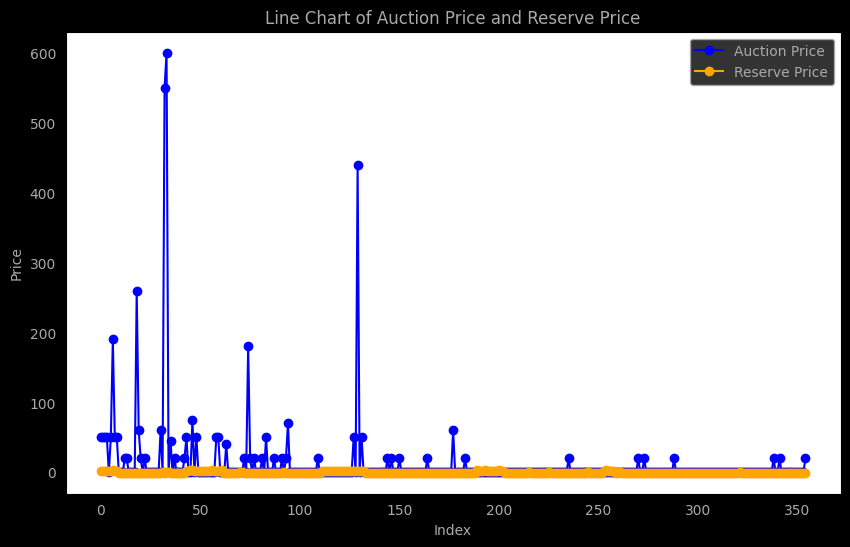

In [18]:
plt.figure(figsize=(10, 6), facecolor='black')
plt.plot(Auc23['Auction_Price'], label="Auction Price", color='blue', marker='o')
plt.plot(Auc23['Reserve_Price'], label="Reserve Price", color='orange', marker='o')
plt.title("Line Chart of Auction Price and Reserve Price", color='darkgray')
plt.xlabel("Index", color='darkgray')
plt.ylabel("Price", color='darkgray')
plt.legend(facecolor='black', edgecolor='darkgray', fontsize=10, labels=['Auction Price', 'Reserve Price'], loc='best', frameon=True, labelcolor='darkgray')
plt.tick_params(axis='both', which='both', labelcolor='darkgray')
plt.show()



Histogram for Form

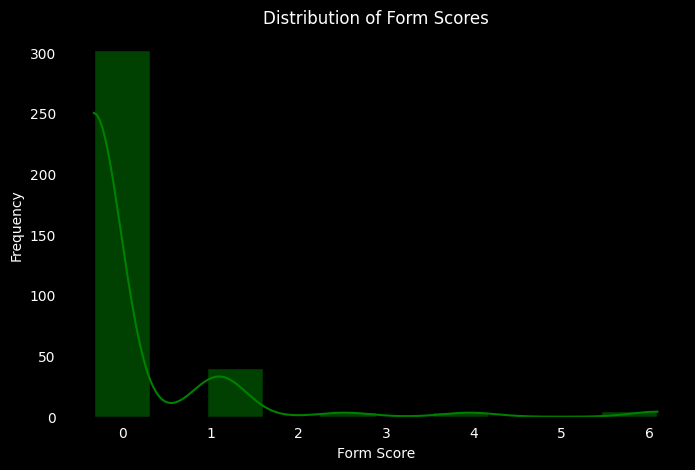

In [19]:
plt.figure(figsize=(8, 5), facecolor='black')
ax = sns.histplot(Auc23['Form'], kde=True, bins=10, color="green")
ax.set_facecolor('black')
plt.title("Distribution of Form Scores", color='white')
plt.xlabel("Form Score", color='white')
plt.ylabel("Frequency", color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()


Boxplot

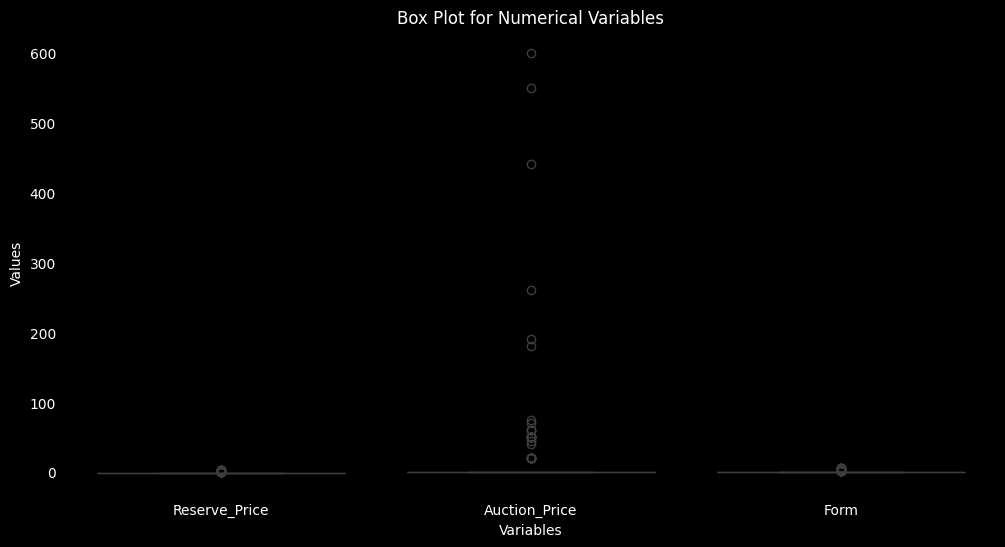

In [20]:
plt.figure(figsize=(12, 6), facecolor='black')
ax = sns.boxplot(data=Auc23[['Reserve_Price', 'Auction_Price', 'Form']])
ax.set_facecolor('black')
plt.title("Box Plot for Numerical Variables", color='white')
plt.xlabel("Variables", color='white')
plt.ylabel("Values", color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()


Bar Chart for Countries

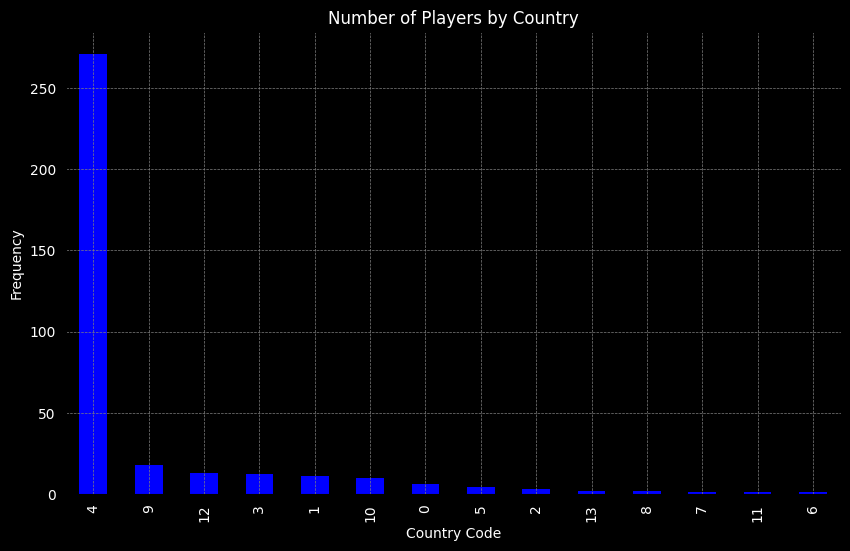

In [21]:
plt.figure(figsize=(10, 6), facecolor='black')
ax = Auc23['Country'].value_counts().plot(kind='bar', color='blue')
ax.set_facecolor('black')
plt.title("Number of Players by Country", color='white')
plt.xlabel("Country Code", color='white')
plt.ylabel("Frequency", color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()



Density Plot for Age

<ipython-input-22-7e83fd3f988e>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Auc23_sold['Age'], color='green', shade=True)


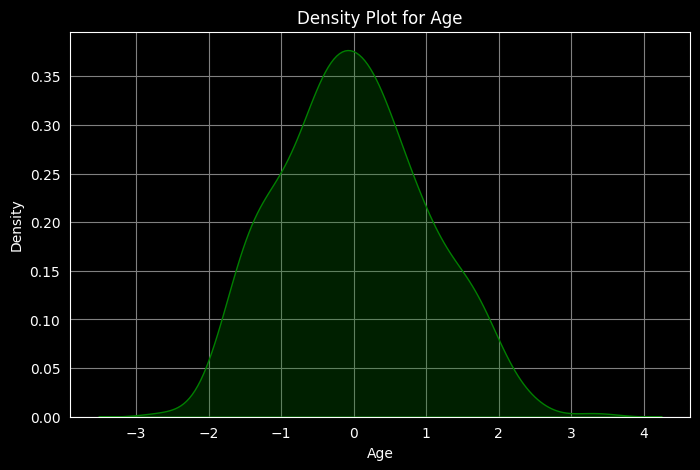

In [22]:
sns.set_style("darkgrid", {'axes.facecolor': 'black', 'grid.color': 'gray'})
plt.figure(figsize=(8, 5), facecolor='black')
sns.kdeplot(Auc23_sold['Age'], color='green', shade=True)
plt.title("Density Plot for Age", color='white')
plt.xlabel("Age", color='white')
plt.ylabel("Density", color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()


Bivariate Analysis

Correlation Analysis

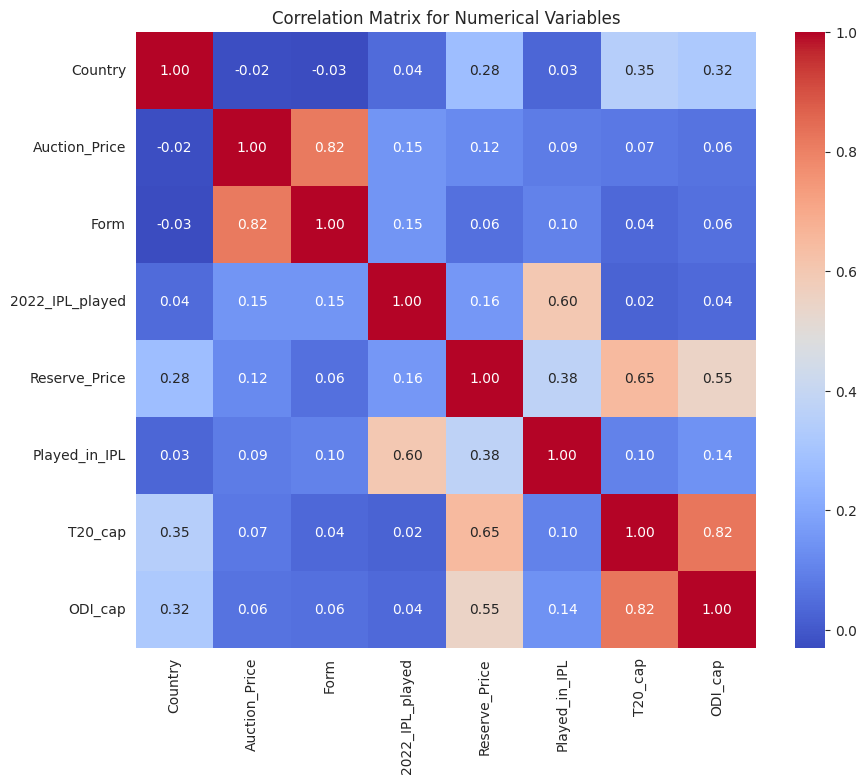

In [23]:
numerical_columns = ['Country', 'Auction_Price', 'Form', '2022_IPL_played', 'Reserve_Price', 'Played_in_IPL',
                     'T20_cap', 'ODI_cap']
correlation_matrix = Auc23[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix for Numerical Variables")
plt.show()

Scatter Plot

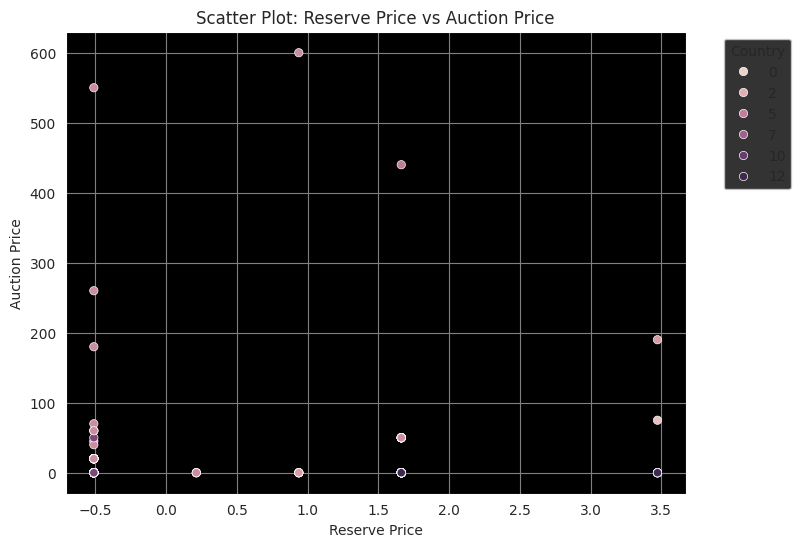

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Auc23, x='Reserve_Price', y='Auction_Price', hue='Country')
plt.title("Scatter Plot: Reserve Price vs Auction Price")
plt.xlabel("Reserve Price")
plt.ylabel("Auction Price")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Scatter Plot: T20 Caps vs Auction Price

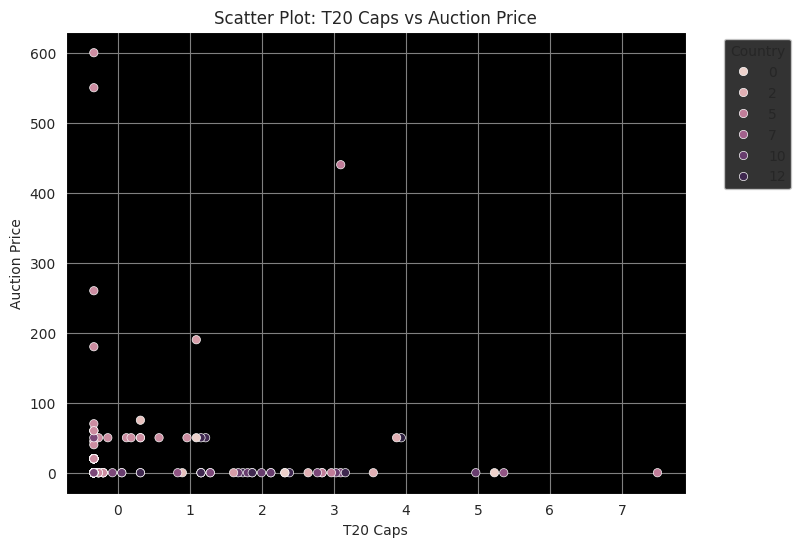

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Auc23, x='T20_cap', y='Auction_Price', hue='Country')
plt.title("Scatter Plot: T20 Caps vs Auction Price")
plt.xlabel("T20 Caps")
plt.ylabel("Auction Price")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Heat Map: Auction Price Distribution by Country and Reserve Price

<ipython-input-26-deb1ad0968ed>:1: FutureWarning: The provided callable <function mean at 0x7f02ee37d5a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_data = pd.pivot_table(Auc23, values='Auction_Price', index='Country', columns='Reserve_Price', aggfunc=np.mean)


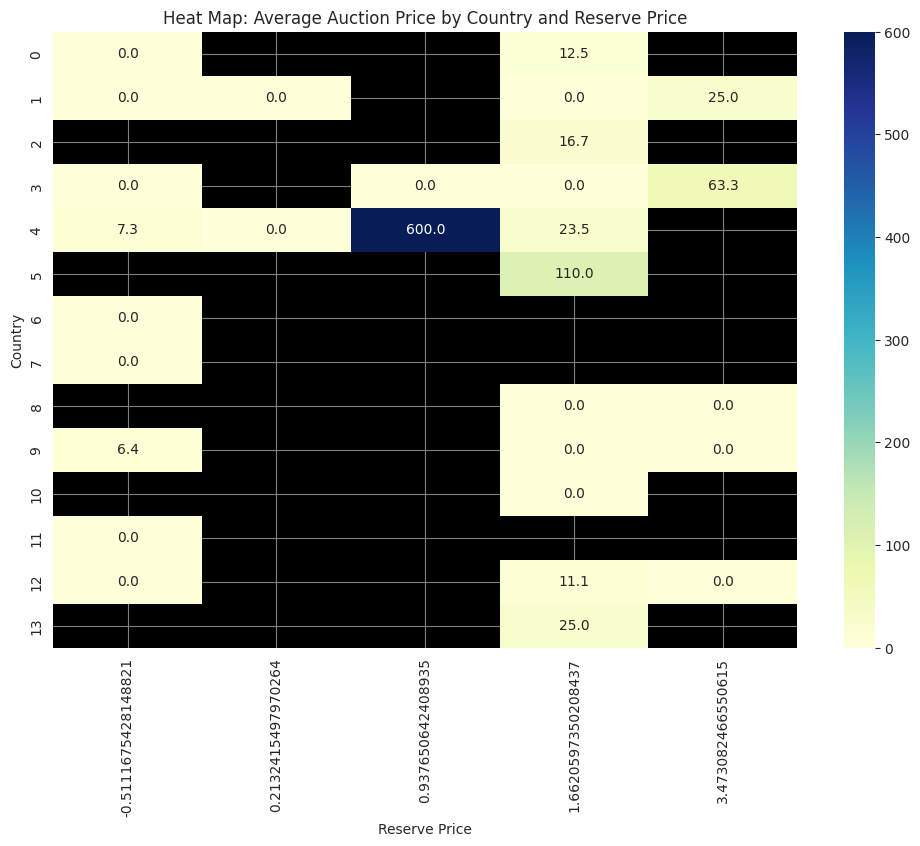

In [26]:
pivot_data = pd.pivot_table(Auc23, values='Auction_Price', index='Country', columns='Reserve_Price', aggfunc=np.mean)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Heat Map: Average Auction Price by Country and Reserve Price")
plt.xlabel("Reserve Price")
plt.ylabel("Country")
plt.show()

Descriptive Analysis

In [27]:
print("Basic Information about the Dataset:")
print(Auc23.info())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(Auc23.describe())

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          355 non-null    int64  
 1   Auction_Price    355 non-null    float64
 2   Form             355 non-null    float64
 3   2022_IPL_played  355 non-null    float64
 4   Reserve_Price    355 non-null    float64
 5   Played_in_IPL    355 non-null    float64
 6   T20_cap          355 non-null    float64
 7   ODI_cap          355 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 22.3 KB
None

Descriptive Statistics:
          Country  Auction_Price        Form  2022_IPL_played  Reserve_Price  \
count  355.000000     355.000000  355.000000     3.550000e+02   3.550000e+02   
mean     4.622535      10.845070    0.000000    -4.003058e-17  -2.001529e-16   
std      2.367040      53.699217    1.001411     1.001411e+00   1.001411e+00  

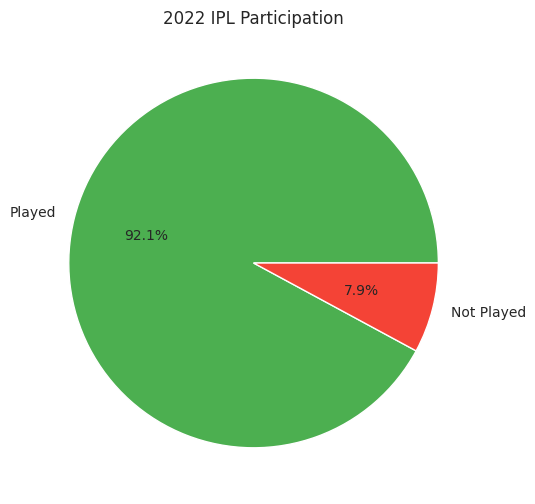

In [28]:
# Pie Chart of IPL Participation in 2022
plt.figure(figsize=(6, 6))
Auc23['2022_IPL_played'].value_counts().plot.pie(
    autopct='%1.1f%%', labels=['Played', 'Not Played'], colors=['#4caf50', '#f44336']
)
plt.title('2022 IPL Participation')
plt.ylabel('')
plt.show()

<ipython-input-29-c354f93183c9>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Country', y='Auction_Price', data=Auc23, ci=None, palette='cool')
<ipython-input-29-c354f93183c9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Auction_Price', data=Auc23, ci=None, palette='cool')


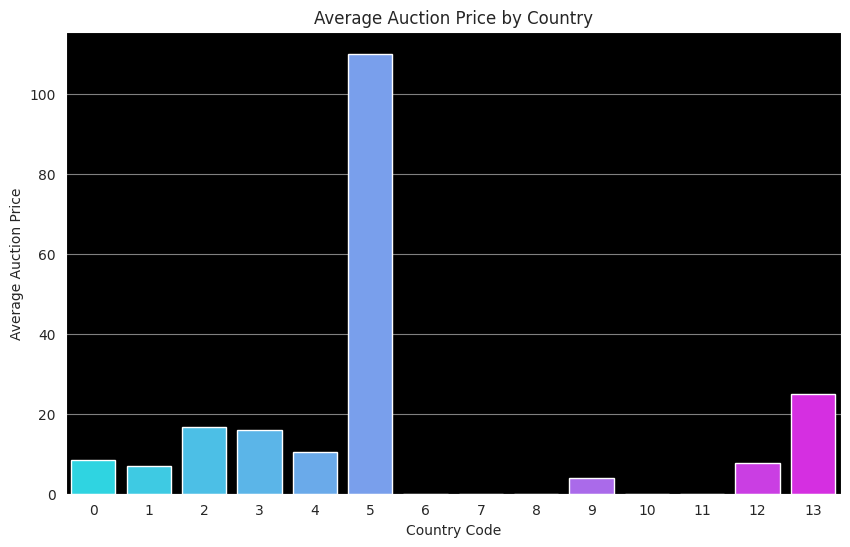

In [29]:
# Avg Auction Price by Country
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Auction_Price', data=Auc23, ci=None, palette='cool')
plt.title('Average Auction Price by Country')
plt.xlabel('Country Code')
plt.ylabel('Average Auction Price')
plt.show()

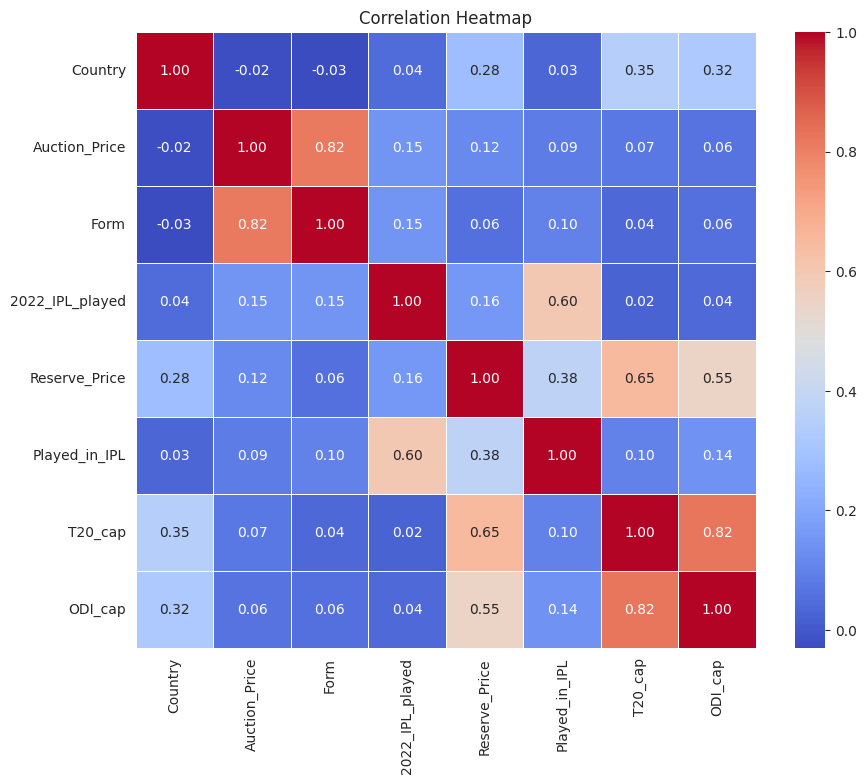

In [30]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(Auc23.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

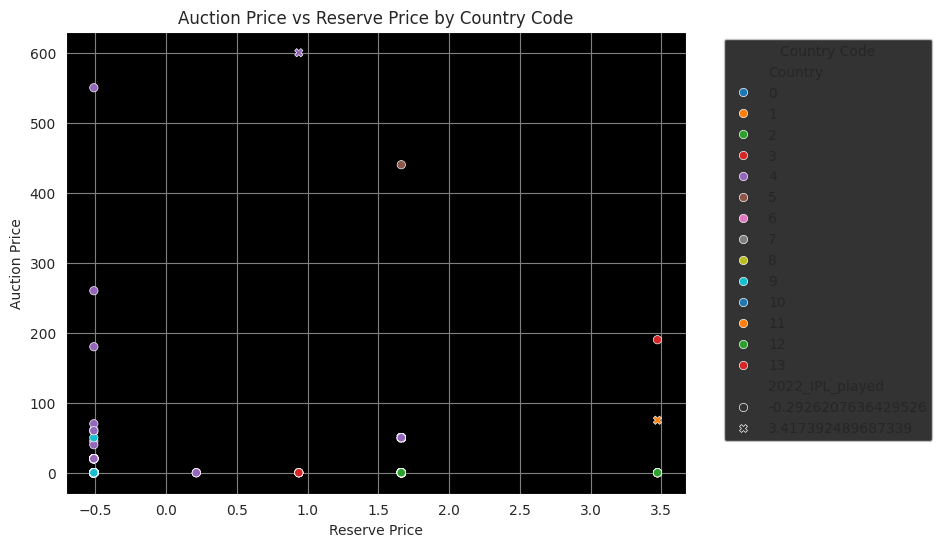

In [31]:
# Reserve Price vs Auction Price
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Reserve_Price', y='Auction_Price', data=Auc23, hue='Country', style='2022_IPL_played', palette='tab10'
)
plt.title('Auction Price vs Reserve Price by Country Code')
plt.xlabel('Reserve Price')
plt.ylabel('Auction Price')
plt.legend(title='Country Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

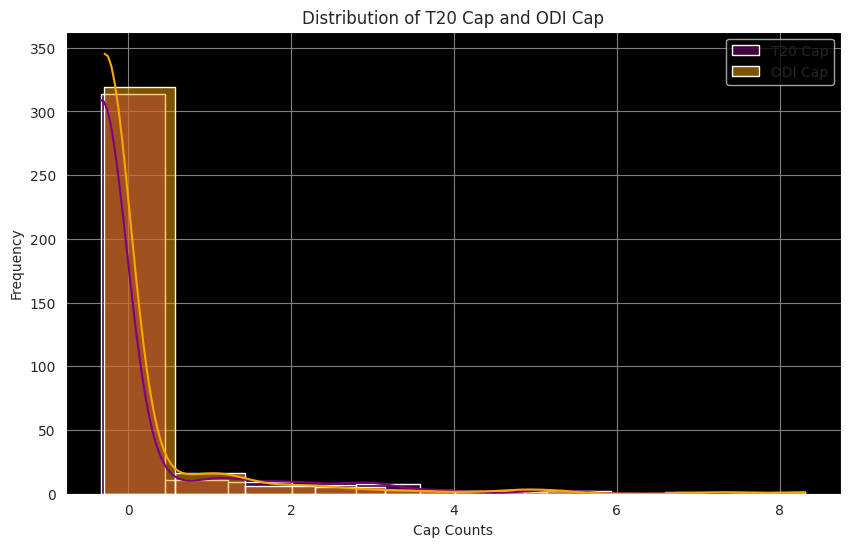

In [32]:
# T20 and ODI Caps
plt.figure(figsize=(10, 6))
sns.histplot(Auc23['T20_cap'], kde=True, color='purple', label='T20 Cap')
sns.histplot(Auc23['ODI_cap'], kde=True, color='orange', label='ODI Cap')
plt.title('Distribution of T20 Cap and ODI Cap')
plt.xlabel('Cap Counts')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [33]:
df = pd.read_csv('Auc_Reduced.csv')

# head of the data
print(df.head())
X = df.drop(columns=["Auction_Price"], inplace = False)
y=df['Auction_Price']

print(X)
print(y)



   Country  Auction_Price      Form  2022_IPL_played  Reserve_Price  \
0        4           50.0  1.096178         3.417392        1.66206   
1       13           50.0  1.096178        -0.292621        1.66206   
2       12           50.0  1.096178         3.417392        1.66206   
3        2           50.0  1.096178        -0.292621        1.66206   
4       10            0.0 -0.331870        -0.292621        1.66206   

   Played_in_IPL   T20_cap   ODI_cap  
0       2.054407  0.959801  5.282731  
1      -0.486758  3.936167  7.326089  
2       2.054407  1.218615  0.019535  
3      -0.486758  3.871463  3.239373  
4      -0.486758  2.836206  5.096971  
     Country      Form  2022_IPL_played  Reserve_Price  Played_in_IPL  \
0          4  1.096178         3.417392       1.662060       2.054407   
1         13  1.096178        -0.292621       1.662060      -0.486758   
2         12  1.096178         3.417392       1.662060       2.054407   
3          2  1.096178        -0.292621       1

# **Lasso Regression & Conversion to .pkl file**

> Add blockquote



Minimum reported mean squared error for test data: 2270.53 (alpha=0.37)
Lasso model saved as 'lasso_model.pkl'


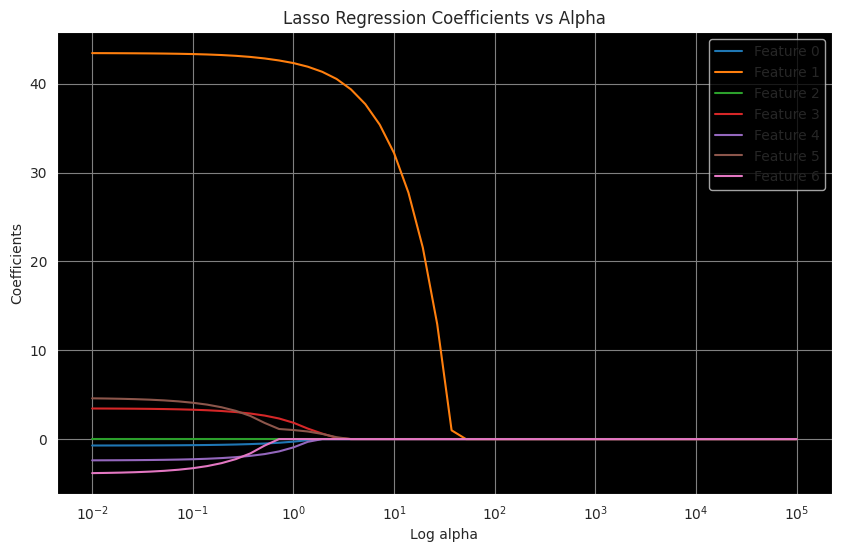

In [34]:
# Assume X and y are already defined
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning: range of alpha values
alphas = np.logspace(-2, 5, 50)

lasso_mse = []
lasso_coefficients = []

# Train Lasso regression models for different alpha values
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)

    # Predict and ensure non-negative predictions
    lasso_pred = lasso.predict(X_test)
    lasso_pred = np.maximum(0, lasso_pred)  # Replace negatives with 0

    # Store results
    lasso_mse.append(mean_squared_error(y_test, lasso_pred))
    lasso_coefficients.append(lasso.coef_)

lasso_coefficients = np.array(lasso_coefficients)

# Minimum MSE and corresponding alpha
minimum_mse_test = min(lasso_mse)
minimum_mse_alpha = alphas[lasso_mse.index(minimum_mse_test)]
print(f"Minimum reported mean squared error for test data: {minimum_mse_test:.2f} (alpha={minimum_mse_alpha:.2f})")

# Retrain the model with the best alpha on the full training set
best_lasso = Lasso(alpha=minimum_mse_alpha)
best_lasso.fit(X_train, y_train)

# Save the trained model to a .pkl file
joblib.dump(best_lasso, 'lasso_model.pkl')
print("Lasso model saved as 'lasso_model.pkl'")

# Plotting coefficients vs alpha
plt.figure(figsize=(10, 6))
for i in range(lasso_coefficients.shape[1]):
    plt.plot(alphas, lasso_coefficients[:, i], label=f"Feature {i}")

plt.xlabel("Log alpha")
plt.ylabel("Coefficients")
plt.title("Lasso Regression Coefficients vs Alpha")
plt.xscale("log")
plt.legend()
plt.show()


# Predicted Auction price

In [35]:
# Train the best Lasso model using the optimal alpha
best_alpha = minimum_mse_alpha
best_lasso = Lasso(alpha=best_alpha)

# Fit the model
best_lasso.fit(X_train, y_train)

# Predict the final auction prices
predicted_prices = best_lasso.predict(X_test)

# Ensure no negative predictions
predicted_prices = np.maximum(0, predicted_prices)

# Create a DataFrame to compare base prices (actual) and predicted prices
results_df = pd.DataFrame({
    'Base Price': y_test,       # Base price
    'Predicted Price': predicted_prices  # Final predicted price
})

# Display the first 10 rows of results
print("\n--- Predicted Auction Prices vs Base Prices ---")
print(results_df.head(5))

# Save results to a CSV if needed
results_df.to_csv('predicted_vs_base_prices.csv', index=False)



--- Predicted Auction Prices vs Base Prices ---
     Base Price  Predicted Price
227         0.0         0.000000
42         20.0        57.798808
256         0.0         1.425908
182         0.0         0.000000
56          0.0         6.111820


Load Lasso Model

In [36]:
model = joblib.load('lasso_model.pkl')

Input from User

In [37]:
# Load the trained model
model = joblib.load('lasso_model.pkl')

# Input feature names (match the order used in training)
feature_names = ['Country', 'Form','Played In IPL 2022', 'Reserve Price', 'Played In IPL', 'T20 Cap', 'ODI Cap']

#numCols = ['Age', 'Test_cap', 'ODI_cap', 'T20_cap','Form','Played_in_IPL','2022_IPL_played']

# Step 1: Take user input
print("Enter the values for the following features:")
user_input = []
for feature in feature_names:
    value = float(input(f"{feature}: "))
    user_input.append(value)

# Step 2: Convert input to the expected format (2D array for scikit-learn)
user_input = np.array(user_input).reshape(1, -1)

# Step 3: Make predictions
predicted_price = model.predict(user_input)

# Step 4: Output the result
print(f"Predicted Auction Price: {predicted_price[0]:.2f}")



Enter the values for the following features:


KeyboardInterrupt: Interrupted by user